<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-разделу" data-toc-modified-id="Выводы-по-разделу-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы по разделу</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуем корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Описание данных

* **Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.

* **Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

Для начала загрузим все необходимые библиотеки для проекта:

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

Далее выгрузим датасет и посмотретим краткую информацию по нему:

In [45]:
try:
    clients = pd.read_csv('/Users/User/Downloads/insurance.csv') 
except:
    clients = pd.read_csv('/datasets/insurance.csv')

In [46]:
print(clients.info()) 
clients.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Сразу же поменяем тип столбцов **Возраст** и **Зарплата** с вещественного *(float)* на целочисленный *(int)*.

In [47]:
clients['Возраст'] = clients['Возраст'].astype('int')
clients['Зарплата'] = clients['Зарплата'].astype('int')

Построим гистограммы по всем столбцам и посмотрим на распределение данных.

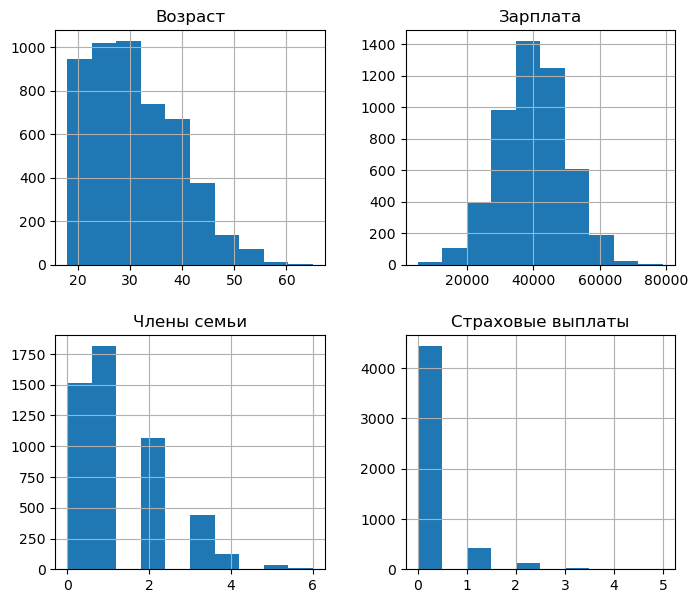

In [48]:
clients[['Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']].hist(figsize=(8, 7))
plt.show()

Построим диаграмму, чтобы визуализировать соотнешение количества мужчин и женщин в нашей выборке данных.

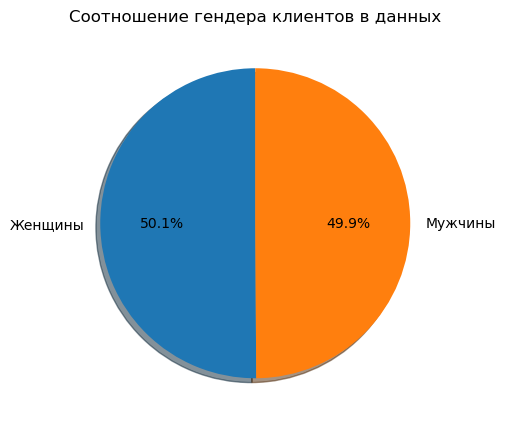

In [49]:
fig, ax = plt.subplots(figsize=(5, 7))
ax.pie(clients['Пол'].value_counts(),
       autopct='%1.1f%%',
       labels=['Женщины', 'Мужчины'],
       shadow=True,
       startangle=90,
       textprops=dict())
plt.title('Соотношение гендера клиентов в данных')
plt.show()

Также посмотрим описательную характеристику по данным:

In [50]:
clients.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.359400,1.194200,0.148000
std,0.500049,8.440807,9900.082063,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Посмотрим на мультиколлинеарность признаков.

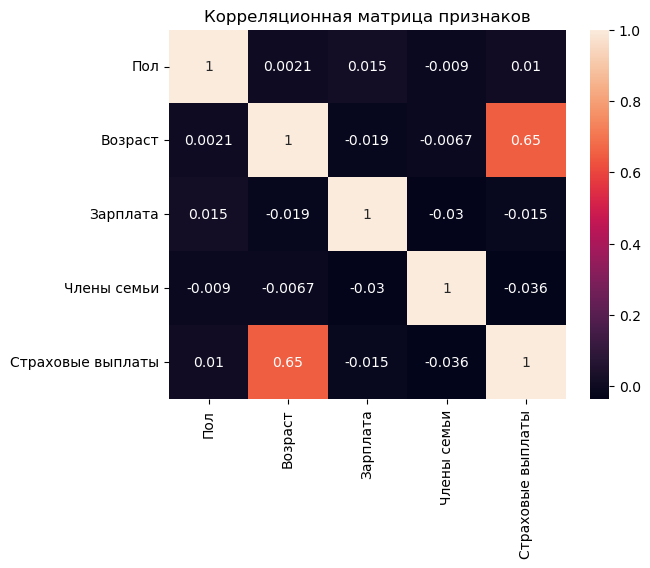

In [51]:
corr = clients.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)
plt.title('Корреляционная матрица признаков')
plt.show()

Также проверим данные на наличие пропусков и дубликатов.

In [52]:
clients.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [53]:
clients.duplicated().sum()

153

### Выводы по разделу

* Наши данные содержат 5 тыс. строк.
* Все данные имеют нормальное распределение или близкое к нему (за исключением категориальных столбцов).
* Распределение по гендеру практически равное (женщин 50.1%, мужчин 49.9%).
* Мултиколлинеарность признаков на очень низком уровне, самая высокая корреляция между **страховыми выплатами** и **возрастом** - 0.65.
* Пропуски в данных отстутсвуют, число явных дубликатов состовляет 153, но это также могут быть люди с полностью совпадающими персональными данными, поэтому удалять их не будем.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** b. Не изменится

**Обоснование:** Составим формулу предсказания вектора $a$, добавив в неё формулы вектора весов, где матрица предсказаний $Х$
 уже домножена на матрицу $P$.

$$
a = (XP)((XP)^T XP)^{-1} (XP)^T y
$$

Применим свойство транспонированных матриц $(AB)^T = B^TA^T$:

$$
a = (XP)(P^TX^T XP)^{-1} P^TX^T y
$$

Применим свойство обратных матриц $(AB)^-1 = B^-1A^-1$ :

$$
a = (XP)P^{-1} (X^T X)^{-1} (P^T)^{-1}  P^TX^T y
$$

Применим свойство обратных матриц $AA^-1 = A^-1A = E$:

$$
a = (XP)(X^T X)^{-1} P^{-1} EX^T y
$$

Так как $EA = AE = A$, то:

$$
a = (XP)(X^TX)^{-1} P^{-1} X^T y
$$

$$
a = X(PP^{-1})(X^TX)^{-1} X^T y
$$

$$
a = X(X^TX)^{-1} X^T y = Xw
$$

$$
a = a
$$

Что и требовалось доказать.

Далее выразим соотношение $w$ и $w_p$. Для этого воспользуемся всеми теми же свойствами, которыми пользовались при преобразованиях выше.

$$
w = (X^T X)^{-1} X^T y
$$
    
    
$$
w_P = ((XP)^T XP)^{-1} (XP)^T y
$$   

$$
w_P = (P^T X^T XP)^{-1} P^T X^T y
$$ 

$$
w_P = (P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$ 

$$
w_P = P^{-1} (X^T X)^{-1} E X^T y = P^{-1} (X^T X)^{-1} X^T y
$$ 

Из всех преобразований, приведённых выше, получаем выражение:

$$
w_P = P^{-1} w
$$ 

## Алгоритм преобразования

**Алгоритм**

1. Создаём случайную квадртную матрицу в переменной *random_matrix*.
2. Проверяем созданную матрицу на обратимость.
3. Умножаем матрицу признаков на случайную квадратную матрицу.
4. Сравниваем метрики для линейной регрессии на превоначальных данных и зашифрованных.

**Обоснование**

Качество линейной регрессии не поменяется, потому что умножение матрицы признаков на квадратную, обратимую матрицу *random_matrix* не изменяет значения вектора предсказаний $a$ (что мы и доказали путём преобразований во втором этапе проекта).

## Проверка алгоритма

Разделим данные на тренировочную и тестовую выборки:

In [54]:
features = clients.drop(columns='Страховые выплаты', axis=1)
target = clients['Страховые выплаты']
features_train, features_test, target_train, target_test = train_test_split(features,    
                                                                            target,     
                                                                            random_state=123,
                                                                            shuffle=True,   
                                                                            test_size=0.25)

Пропишем действие модели линейной регрессии и тут же делааем замер метрики R2 для первоначальных данных до преобразования:

In [55]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
r2_before = r2_score(target_test, predictions)
print('Значение метрики R2 для линейной регрессии', r2_before)

Значение метрики R2 для линейной регрессии 0.4301846988606345


Создаём случайную квадратную матрицу и выведем её:

In [58]:
def get_rand_matrix(data):
    det = 0
    while det == 0:
        matrix = np.random.normal(size=(data.shape[1], data.shape[1]))
        det = np.linalg.det(matrix)
    return matrix

In [59]:
rand_matrix = get_rand_matrix(features)
rand_matrix

array([[ 0.48181704, -0.23058   ,  1.0130774 ,  1.70308301],
       [-0.12302635, -0.17202005, -2.34280074, -0.12403357],
       [-1.09579075, -0.17423966,  0.49570348,  0.21239115],
       [ 0.00796031,  0.84179755, -0.41189756,  0.76859707]])

Проивзодим домножение признаков на случайную матрицу для зашифровки и делаем замер показателя R2 для модели линейной регрессии:

In [60]:
features_train = features_train.dot(rand_matrix)
features_test = features_test.dot(rand_matrix)
    
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
r2_after = r2_score(target_test, predictions)
print('Значение метрики R2 для линейной регрессии после преобразования', r2_after)

Значение метрики R2 для линейной регрессии после преобразования 0.4301846987933239


Посчитаем разницу между метриками R2 для линейной регрессии:

In [61]:
print('Разница между метриками: ', r2_before - r2_after)

Разница между метриками:  6.731060153697399e-11


### Вывод

Разница между показателями стремиться к нулевому значению, поэтому можем сделать вывод, что такой метод защиты данных допустимо использовать.

## Общий вывод

В проекте мы разработали такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию, а также защитили данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Задачу достигли в процессе нескольких этапов, а именно:

1. Загрузили и изучили данные, в итоге чего выявили следующее:
    - наши данные содержат 5 тыс. строк.
    - все данные имеют нормальное распределение или близкое к нему (за исключением категориальных столбцов).
    - распределение по гендеру практически равное (женщин 50.1%, мужчин 49.9%).
    - мултиколлинеарность признаков на очень низком уровне, самая высокая корреляция между **страховыми выплатами** и **возрастом** - 0.65.
    - пропуски в данных отстутсвуют, число явных дубликатов состовляет 153, но это также могут быть люди с полностью совпадающими персональными данными, поэтому удалять их не будем.
2. Доказали, что качество линейной регрессии не изменится при умножения признаков на обратимую матрицу.
3. Предложили алгоритм преобразования данных для решения задачи.
4. Запрограммировали этот алгоритм, применив матричные операции, проверили, что качество линейной регрессии из sklearn не отличается до и после преобразования и применили метрику R2.

По итогу мы получили такие значения метрики R2, что они совпадают с точностью до первых **10 знаков** после запятой, что говорит нам о минимальном различии, а следовательно можно сделать вывод - такой метод защиты данных допустимо использовать.